<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

* 教學目標：主要說明 matplotlib 的基礎操作
  1. 使用常見的子圖與軸圖來做畫面配置
  2. 等高線圖
* 範例重點
  如何使用亂數, 資料集來操作

In [1]:
#載入 numpy, 提供亂數資料與數學式, 
import numpy as np

# 載入 matplotlib
import matplotlib.pyplot as plt

# 從 `sklearn` 載入 `datasets`
from sklearn import datasets

#導入必要的模組
from mpl_toolkits.mplot3d import Axes3D

# 【基礎20】

## 製作繪圖板 Subplots

* 參考 Day20_Subplot.png
* plt.subplot(a, b, c)可透過 a ,b ,c 的數值設定來決定圖象的數量、大小
  * a：代表 X 軸的分割
  * b：代表 y 軸的分割
  * c：代表子版的編號數

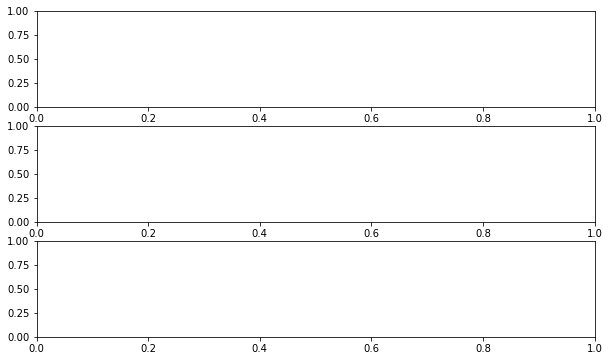

In [2]:
fig = plt.figure(figsize=(10,6)) #設定 figure 的尺寸
ax1 = fig.add_subplot(3,1,1) #分別畫出三格圖象，都可以針對特定圖象編輯與繪圖
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

plt.show()

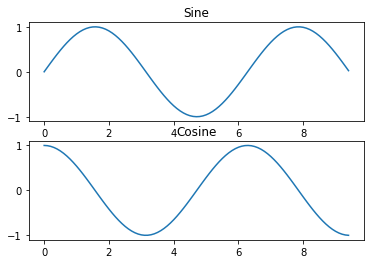

In [3]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# 設定雙格畫板大小
plt.subplot(2, 1, 1)
plt.plot(x, y_sin)
plt.title('Sine')

# 設定雙格畫板大小
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title("Cosine")

plt.show()

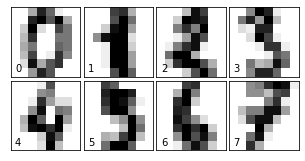

In [4]:
# 載入 `digits`
digits = datasets.load_digits()

# 設定圖形的大小（寬, 高）
fig = plt.figure(figsize=(4, 2))

# 調整子圖形 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 把前 8 個手寫數字顯示在子圖形
for i in range(8):
    # 在 2 x 4 網格中第 i + 1 個位置繪製子圖形，並且關掉座標軸刻度
    ax = fig.add_subplot(2, 4, i + 1, xticks = [], yticks = [])
    # 顯示圖形，色彩選擇灰階
    ax.imshow(digits.images[i], cmap = plt.cm.binary)
    # 在左下角標示目標值
    ax.text(0, 7, str(digits.target[i]))

# 顯示圖形
plt.show()

* 添加圖例的方式：添加 subplot 的時候傳入 label 引數

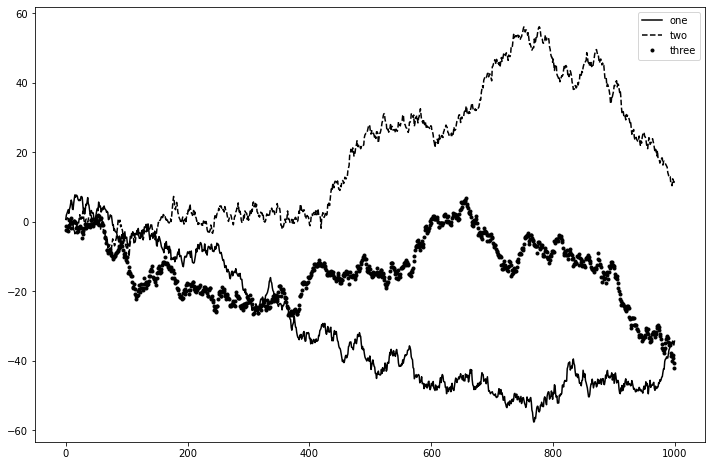

In [5]:
fig = plt.figure(figsize = (12,8)) ; ax = fig.add_subplot(1,1,1)

ax.plot ( np.random.randn(1000).cumsum(),'k' , label = 'one')
ax.plot ( np.random.randn(1000).cumsum(),'k--' , label = 'two')
ax.plot ( np.random.randn(1000).cumsum(),'k.' , label = 'three')

ax.legend(loc = 'best')

## 除了 PLT 之外的繪圖

* plt.***系列。通過 http://plt.xxx 來畫圖
* fig， ax = plt.subplots（）：指定 figure 和 axes，然後對 axes 單獨操作
* Figure：可以解釋為畫布。fig = plt.figure()
  * 畫圖的第一件事，就是創建一個畫布 figure
* Axes：這個不是你畫圖的 xy 座標可以把 axes 理解為你要放到畫布上的各個物體。如果你的 figure 只有一張圖，那麼你只有一個 axes。 如果你的 figure 有 subplot，那麼每一個 subplot，是一個 Axes
* Axis：這才是 xy 座標軸。ax.xaxis/ax.yaxis
* 參考 Day20_PLT之外的繪圖.png

### figure 參數說明

* 語法：
  ```
  figure(
  num = None, 
  figsize=None, 
  dpi=None,
  facecolor=None,
  edgecolor=None,
  frameon=True,
  FigureClass=<class 'matplotlib.figure.Figure'>,
  clear=False,
  **kwargs)
  ```
* 參數說明：<br>

  | 參數 | 說明 | 預設值 | 備註 |
  |------|:------:|:------:|:------:|
  | num | 設定名稱 | 升序命名 figure(透視表輸出視窗) e.g. “figure1” | 可自行設定 figure 名稱，名稱是 INT 或是 str 型別 |
  | figsize | 設定尺寸 | rcParams["figure.fig.size"]=[6.4, 4.8]，即 figure 長寬為 6.4 * 4.8 | |
  | dpi | 設定畫素密度 | rcParams["sigure.dpi"]=100 | |
  | facecolor | 設定背景色 | rcParams["figure.facecolor"]='w'，即白色white | |
  | frameon / edgecolor | 設定要不要繪製輪廓及輪廓顏色 | rcParams["figure.edgecolor"]='w'，即白色 white | |
  | Figureclass | 設定使不使用一個模板 | 不使用 | |
  | clear | 設定當同名 figure 存在時，是否替換它 | False，即不替換 | |

### text 參數說明

* plt.text：在對應位置加上文字說明來生成相應的數字標籤
* 語法：
  ```
  plt.text(0.5,0.5, 'axes([0.2,0.2,.3,.3])',ha='center',va='center',size=16,alpha=.5)
  ```
* 參數說明：
  * (0.5, 0.5)：坐標
  * ha='center', va= 'center'：代表 horizontalalignment（水平對齊）、verticalalignment（垂直對齊）的方式
  * size：文字大小
  * alpha：透明度

### 其他函數

* 圖標如 plt.title, plt.xlabel, plt.ylabel
* 參數：
  * '欲標示的文字'
  * fontsize=18
  * fontfamily='sans-serif'
  * fontstyle='italic'

## 製作繪圖板 Axes

### 軸圖進階：軸與子圖非常相似
* 但是可以將圖放置在圖中的任何位置。因此，如果要在較大的圖中放置較小的圖，則可以使用軸。
* 特別提醒: tick 刻度線定位器<br>
  格式正確的刻度線是準備發布的數據的重要組成部分。Matplotlib為滴答提供了一個完全可配置的系統。有刻度線定位器可以指定刻度線應出現的位置，刻度線格式化程序可以為刻度線提供所需的外觀。主刻度線和次刻度線可以相互獨立地定位和格式化。

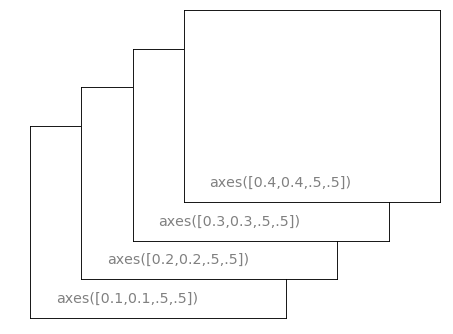 

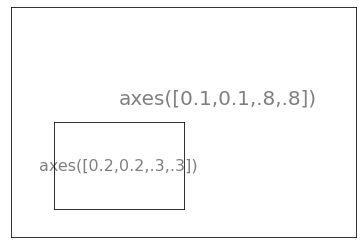

In [5]:
#決定最外框
plt.axes([0.1,0.1,.8,.8])
plt.xticks([]), plt.yticks([])
plt.text(0.6,0.6, 'axes([0.1,0.1,.8,.8])',ha='center',va='center',size=20,alpha=.5)

#決定內框
plt.axes([0.2,0.2,.3,.3])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'axes([0.2,0.2,.3,.3])',ha='center',va='center',size=16,alpha=.5)

plt.show()

### 等高線圖

<ipython-input-6-deedad4369ac>:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)


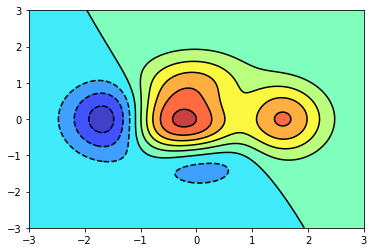

In [6]:
#定義函數與回傳的值
def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

plt.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)
plt.show()

## 製作 Axes3D 繪圖板

* 3D圖形在資料分析、資料建模、圖形和影像處理等領域中都有著廣泛的應用
* 主要把想要觀察的重點與場景實現兩種交互
  * 一種是可以操縱場景從而能夠從不同的角度觀察模型
  * 一種是擁有添加與操作修改模型物件的能力

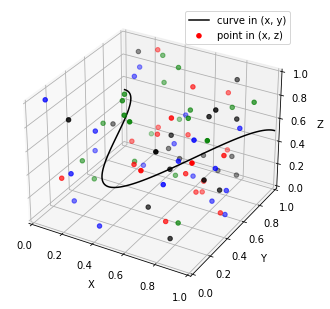

In [9]:
# 創建一個 3d 坐標系
fig = plt.figure()
ax = Axes3D(fig)

#直接查詢參數與設定
#help(plt.plot)
#help(np.random.sample)

# 利用 x 軸和 y 軸繪製sin曲線
x = np.linspace(0, 1, 100) # linspace創建等差陣列
y = np.cos(x * 2 * np.pi) / 2 + 0.5

# 通過zdir='z' 將資料繪製在 z 軸，zs=0.5 則是將資料繪製在 z=0.5 的地方
ax.plot(x, y, zs = 0.5, zdir = 'z', color = 'black', label = 'curve in (x, y)')

# 繪製散點數據 （每個顏色 20 個 2D 點）在 x 軸和 z 軸
colors = ('r', 'g', 'b', 'k')
np.random.seed(19680801) # 設置隨機函數複現

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
z = np.random.sample(20 * len(colors))

c_list = []
for i in colors:
    c_list.extend([i] * 20)
    
# 繪製散點座標通過 zdir='y' 將資料繪製在 y 為 0 的地方
ax.scatter(x, y, z, zdir = 'y', c = c_list, label = 'point in (x, z)')

# 設置圖例
ax.legend()
# 限制個軸的範圍
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
# 軸添加標籤
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()